# Regresiones lineales

Este programa tiene como objetivo ejemplificar el funcionamiento del algoritmo de regresión lineal básico para la predicción de valores dado un dataset bien definido.

In [180]:
# Iniciamos importando pyplot y numpy.
import matplotlib.pyplot as plt
import numpy as np

Se trabaja con un conjunto de valores ya definidos para X y Y.

In [181]:
# Establecemos un arreglo X con valores variados.
X = np.array([0, 1.5, 1.7, 2.1, 2.5, 2.8, 2.9, 3, 3.1,
            3.2, 3.5, 4, 4.8, 5, 5.45, 5.4, 9])
print(X)
# Establecemos un arreglo Y con valores variados.
Y = np.array([8, 15.1, 18.5, 21.5, 22.3, 23.8, 29.9, 35, 36.1,
            37.2, 38.5, 39, 42.8, 51, 55.32, 54.4, 70])
print(Y)

[0.   1.5  1.7  2.1  2.5  2.8  2.9  3.   3.1  3.2  3.5  4.   4.8  5.
 5.45 5.4  9.  ]
[ 8.   15.1  18.5  21.5  22.3  23.8  29.9  35.   36.1  37.2  38.5  39.
 42.8  51.   55.32 54.4  70.  ]


Si graficamos este conjunto de datos con pyplot, obtenemos lo siguiente:

Text(0, 0.5, 'Y')

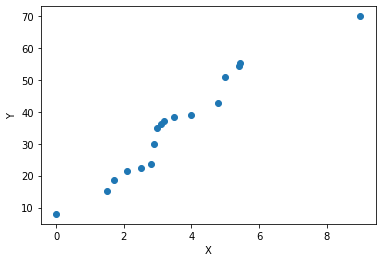

In [182]:
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')

La regresión lineal convencional se define por la ecuación de la recta, con una pendiente, el valor de la variable independiente y la ordenada al origen.

$$y = mx + b$$

En el contexto del Machine Learning, la pendiente se denota generalmente con $\theta_{1}$ y la ordenada al origen con $\theta_{2}$, lo que reescrito se denota como:

$$h_{\theta}(x) = \theta_{1}x + \theta_{0}$$

El objetivo de la regresión es crear una recta que represente el comportamiento convencional o tendencia que sigue un conjunto de datos especificado. Para enseñar a una máquina a realizar tal procedimiento, se requiere un algoritmo correctamente diseñado y específico.


In [183]:
#Especificamos los parámetros de la recta lineal e imprimimos los valores.
theta0 = 1  # M = pendiente
theta1 = 1  # B = Ordenada al origen
m = X.shape[0]  # Número de datos en el conjunto.

print("Theta0 = ", theta0)
print("Theta1 = ", theta1)
print("Número de datos = ", m)

Theta0 =  1
Theta1 =  1
Número de datos =  17


Si intentamos aplicar directamente la regresión con lo establecido anteriormente, se obtendría la siguiente "predicción inicial", alejada de los datos actuales.

In [184]:
# Creamos una función de regresión lineal donde se declara explícitamente 
# la pendiente y la ordenada al origen.
def Regresion(X):
    reg = theta1*X+theta0
    return reg

Predicción =  [ 1.    2.5   2.7   3.1   3.5   3.8   3.9   4.    4.1   4.2   4.5   5.
  5.8   6.    6.45  6.4  10.  ]


Text(0, 0.5, 'Y')

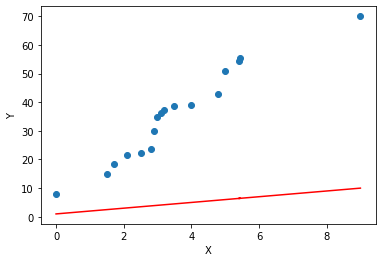

In [185]:
# Llamamos a la función Regresion para obtener una predicción dados los valores iniciales.
# Devuelve un arreglo con los valores Y para cada valor de X.
regY = Regresion(X)
print("Predicción = ", regY)

# Imprimimos con pyplot nuestra predicción de los valores de Y.
plt.plot(X, regY, c='r')
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")

Cómo se observa, la predicción hecha se acerca pobremente a la realidad en cuanto a la tendencia que siguen los datos actuales. Asignar valores aleatorios a $\theta_{1}$ y $\theta_{2}$ en un intento de encontrar la recta correcta resultaría en un proceso árduo y demasiado costoso temporalmente, y es por ello que se requiere realizar una optimización para hallar la recta que se amolde de mejor forma al comportamiento del dataset.

# Optimizadores y Función de costo

Una función de costo tiene como utilidad realizar una comparación entre un valor predecido por un modelo contra el valor que se espera obtener idealmente. Esto nos lleva a poder conocer la "pérdida" del modelo, es decir, qué tanto se alejan las predicciones de los valores ideales que se esperan obtener. 

Por otra parte, el optimizador busca, como dice el nombre tal cual, optimizar el modelo de forma que hallar la recta óptima no resulte computacionalmente costoso. 

Para hacer que nuestra modelo pueda entrenarse debemos indicar cuál será su función de costo y su optimizador. Algunas funciones de costo son:

* **mean_squared_error**
* **sparse_categorical_crossentropy** (para softmax)

Por otro lado, los optimizadores son:

* **RMSprop**
* **Adam**
* **Descenso del gradiente**
* **GDM**

Para los objetivos de este cuaderno de Jupyter, se abordará el MSE como función de costo y el descenso del gradiente como optimizador.

# Error Cuadrático Medio

Esta función de costo parte de calcular la coordenada en Y a partir de los valores de $\theta_{1}$ y $\theta_{0}$ propuestos y restar el resultado obtenido con el valor en Y original o que se espera obtener idealmente. Elevando al cuadrado, se evita tener resultados negativos

$$J(\theta_0,\theta_1) = \frac{1}{2m} \sum_{i = 1}^{m} ((\theta_1*x^{(i)} + \theta_0)-y^{(i)})^{2}$$

El superíndice $i$ se refiere a la posicion en la que se encuentra el dato, por ejemplo con $i$ = 3; $x^{(3)}$ = 1.5 y $y^{(3)}$ = 18.5.

El resultado deseado con la función de costo es que, comparando los valores predichos con los reales, la pérdida entre ambos valores o "el costo" sea lo más mínimo posible. 

Ejemplo: con los valores usados previamente, se definen 2 arreglos X y Y con cada punto teniendo una correspondencia entre ellos en función:

X = [1 , 1.1 , 1.5 , 2 , 2.3 , 2.8 , 2.9 , 3 , 3.1 , 3.2 , 3.5 , 4 , 4.8 , 5 , 5.32 , 5.4 , 6])

Y = [10 , 15.1 , 18.5 , 21 , 22.3 , 23.8 , 24.9 , 35 , 36.1 , 37.2 , 38.5 , 42 , 42.8 , 51 , 55.32 , 54.4 , 56]

Aplicando ECM, es posible calcular el valor del costo aplicando la expresión anterior y calculando los términos de la suma. Entonces, dados los valores:

$$\theta_0 = 0 $$
$$\theta_1 = 0 $$
$$m = 17 (Datos)$$

Calculando la serie:

$$J(\theta_0,\theta_1) = \frac{1}{2m} [((0*1 + 0)-10)^{2} + ((0*1.1 + 0)-15.1)^{2} + ((0*1.5 + 0)-18.5)^{2} + ((0*2 + 0)-21)^{2} + ...)]$$

$$J(\theta_0,\theta_1) = \frac{1}{2m} [(100) + (228.01) + (342.25) + (441) + ...)]$$

$$J(\theta_0,\theta_1) = \frac{1}{2m} * 23541.802$$

$$J(\theta_0,\theta_1) = \frac{1}{2*(17)} * 23541.802$$

$$J(\theta_0,\theta_1) = 692.405$$

Como se mencionó, la meta final es que al realizar la regresión, el valor de la función de costo sea lo más pequeño posible dados los dos parámetros $\theta_{1}$ y $\theta_{0}$.

# Descenso del gradiente

Buscar los valores ideales para $\theta_{1}$ y $\theta_{0}$ por medio de una verificación manual dista de ser un método ideal. Por medio de un optimizador, es posible ajustar y hallar los valores ideales para los parámetros del modelo. 

Se parte de las siguientes expresiones:

$$\theta_0 = \theta_0 - \alpha\frac{\partial J(\theta_0,\theta_1)}{\partial \theta_0}$$

$$\theta_1 = \theta_1 - \alpha\frac{\partial J(\theta_0,\theta_1)}{\partial \theta_1}$$

El uso de derivadas proviene de la técnica de búsqueda de máximos y mínimos en funciones de variable real. A partir de las derivadas parciales de la función de costo, se busca hallar los puntos $\theta_{a1}$ y $\theta_{a0}$  donde el valor de la pendiente de la recta tangente es 0.

$\alpha$ es un parámetro para definir que tan rápido va a aprender nuestro algoritmo. Se denomina como "tasa de aprendizaje" (learning rate) y comunmente se define con un valor entre 0.001 y 0.01.

Derivada de la Función de Costo:

$$J(\theta_0,\theta_1) = \frac{1}{2m} \sum_{i = 1}^{m} ((\theta_1*x^{(i)} + \theta_0)-y^{(i)})^{2}$$

Derivada con respecto a $\theta_1$

$$\frac{\partial J(\theta_0,\theta_1)}{\partial \theta_1} = \frac{2}{2m} \sum_{i = 1}^{m} ((\theta_1*x^{(i)} + \theta_0)-y^{(i)}) * x^{(i)}$$

Derivada con respecto a $\theta_0$

$$\frac{\partial J(\theta_0,\theta_1)}{\partial \theta_0} = \frac{1}{m} \sum_{i = 1}^{m} ((\theta_1*x^{(i)} + \theta_0)-y^{(i)})$$


El descenso del gradiente parte de este procedimiento para "avanzar" en la dirección negativa del gradiente de la función de costo (definida como una función multivariable). Iniciando desde un punto de partida aleatorio $x_{n}$, se comienza a restar el valor del gradiente multiplicado por la tasa de aprendizaje para controlar el paso del algoritmo. El cálculo iterativo dará como resultado un nuevo punto de partida $x_{n+1}$ hasta lograr ubicar al mínimo de la función.

In [186]:
# Se define la función de costo ECM para la regresión lineal.
def FuncionCosto(X, Y):
    suma = 0
    for i in range(0, m):
        suma = suma + (Regresion(X[i])-Y[i])**2
        total = suma/(2*m)
    return total

In [187]:
# Se define la optimización para la regresión lineal.

d_theta0 = 0
d_theta1 = 0
for i in range(0, m):
    d_theta0 = d_theta0 + (Regresion(X[i]) - Y[i])
    d_theta1 = d_theta1 + (Regresion(X[i]) - Y[i]) * X[i]

d_theta0 = d_theta0/m
d_theta1 = d_theta1/m
print("Derivada Theta 0:", d_theta0)
print("Derivada Theta 1:", d_theta1)


Derivada Theta 0: -30.674705882352942
Derivada Theta 1: -134.33773529411766


In [188]:
# Ahora, se añade el ratio de aprendizaje del modelo para la optimización.
#Se usan las expresiones generales.
alpha = 0.005
theta0 = theta0 - alpha*d_theta0
theta1 = theta1 - alpha*d_theta1

print("Descenso: Nuevo theta0 = ", d_theta0)
print("Descenso: Nuevo theta1 = ", d_theta1)

Descenso: Nuevo theta0 =  -30.674705882352942
Descenso: Nuevo theta1 =  -134.33773529411766


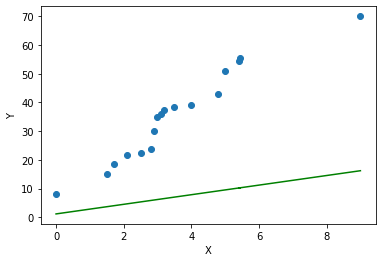

In [189]:
# Finalmente, se grafica la función de costo ECM para la regresión lineal.
plt.plot(X, Regresion(X), c='g')
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Entrenamiento del modelo

Por medio de la metodología descrita, es posible iniciar a entrenar el modelo para ser capaz de predecir adecuadamente el comportamiento de los valores de la ordenada. Definiendo las "épocas" como las veces a entrar el modelo, y 2 arreglos para graficar iteraciones como la pérdida en cada una, se tiene lo siguiente:

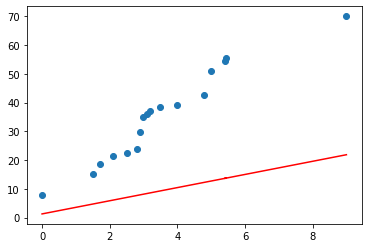

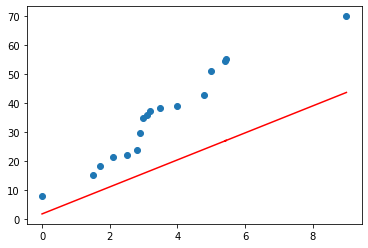

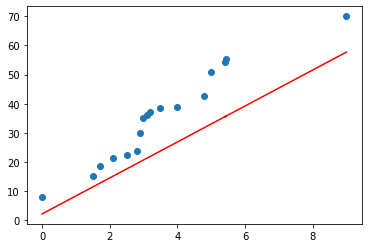

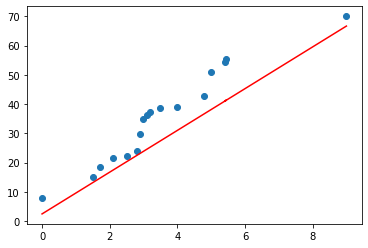

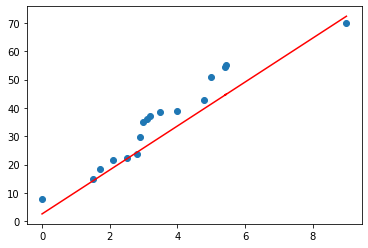

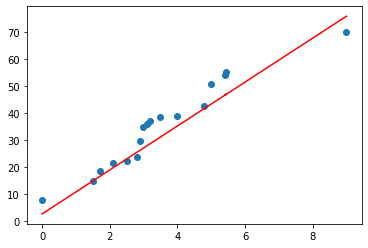

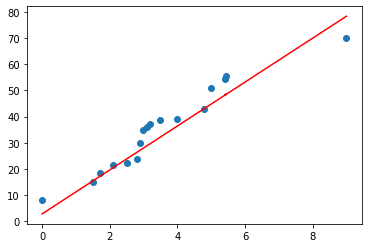

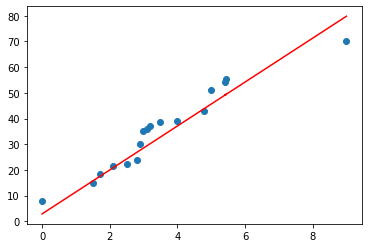

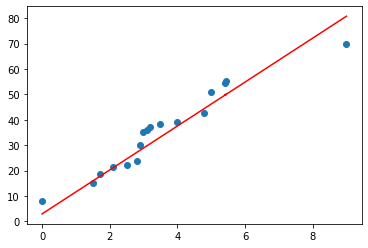

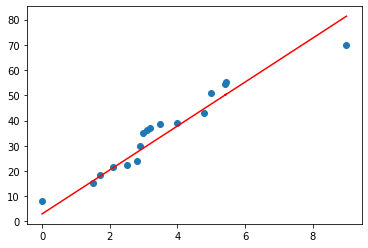

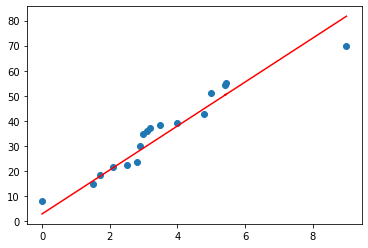

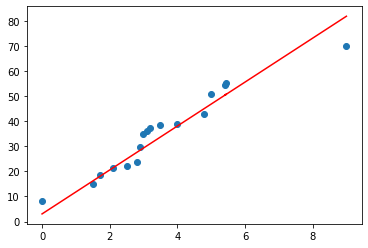

<Figure size 432x288 with 0 Axes>

In [190]:
epocas = 60 # Epoch o épocas totales de entrenamiento.
iteracion = [] #Para graficar las iteraciones con respecto a la perdida
perdida = [] #Para graficar con iteraciones

for i in range(0,epocas):
    suma_theta0 = 0
    suma_theta1 = 0
    for k in range(0,m):
        suma_theta0 = suma_theta0 + (Regresion(X[k])-Y[k])
        suma_theta1 = suma_theta1 + (Regresion(X[k])-Y[k])*X[k]

    theta0 = theta0 - alpha * (suma_theta0/m)
    theta1 = theta1 - alpha * (suma_theta1/m)

    # Si la iteración es múltiplo de 5, se grafica.
    if i % 5 == 0:
        plt.plot(X,Regresion(X),c='r')
        plt.scatter(X,Y)
        plt.pause(0.5)
        plt.clf()

    iteracion.append(i)
    perdida.append(FuncionCosto(X,Y))

Con el resultado siendo mucho más satisfactorio, se calcula el valor que toma la función de costo que, gradualmente, se acerca a un valor mínimo (que no necesariamente es 0).

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59] [400.65792019219674, 337.04830963400997, 283.83298566355256, 239.31326744752036, 202.06808057598218, 170.9085893121112, 144.8402430535193, 123.03102533978327, 104.78489175682897, 89.51954874418806, 76.74786389431881, 66.0623142684392, 57.12197624189395, 49.64164153031822, 43.38271192611049, 38.14558205999083, 33.76326700757151, 30.096071302499674, 27.027129164601252, 24.45867356496398, 22.308915017991254, 20.509430455971227, 19.002978826071963, 17.741673672772524, 16.68545436548701, 15.800807165376668, 15.059695301452093, 14.438663898682124, 13.918091182970393, 13.481562057744142, 13.115344053609737, 12.80794892078576, 12.549765868167047, 12.33275474018988, 12.150189336179967, 11.996442677662602, 11.866807368301112, 11.75734531146094, 11.664761987637739, 11.5

Text(0, 0.5, 'Costo')

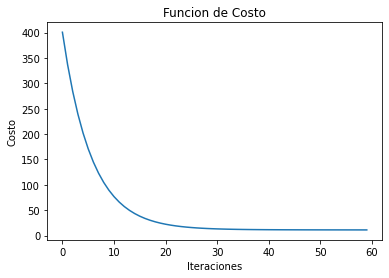

In [191]:
plt.plot(iteracion, perdida)
print(iteracion, perdida)
plt.title('Funcion de Costo')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')

In [168]:
# Se calcula el valor final de la función de costo.
FuncionCosto(X,Y)

5.297646275286252

In [169]:
# Imprimimos los valores finales de theta0 y theta1.
print(theta1)
print(theta0)

# Se realiza una predicción con un valor X dado y arroja el valor Y predicho.
Regresion(7)

9.241228824909527
3.0772449097142434


67.76584668408093

# Perceptrón

La regresión anterior fue desarrollada de forma completamente manual, sin embargo, es posible desarrollar lo anterior por medio de una red neuronal simple compuesta por un perceptrón: el modelo de red neuronal más básico compuesto por una "neurona" o unidad básica de inferencia.

La ventaja más evidente de esta forma de trabajo es el enorme ahorro de tiempo para que el programador pueda enfocarse en el problema que desea resolver, no en desarrollar las herramientas que requiere para resolverlo. En este ejemplo se crea una red neuronal elemental con tensorflow con el fin de realizar una regresión lineal.

In [ ]:
pip install tensorflow

In [192]:
# Importamos la biblioteca de tensorflow y numpy.
import tensorflow as tf
import numpy as np

# Creamos una capa de entrada de 1 unidad con una entrada de una neurona.
capa = tf.keras.layers.Dense(units= 1, input_shape = [1])

# Definimos el modelo de tensorflow como una red neuronal de tipo secuencial.
modelo = tf.keras.Sequential([capa])

# Compilamos el modelo definiendo la función de costo y el optimizador.
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.05), 
    loss='mean_squared_error'
)

Text(0, 0.5, 'Y')

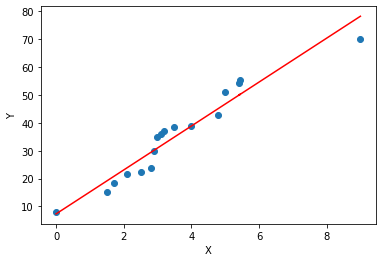

In [193]:
# Definimos el entrenamiento de la red neuronal.
entrenamiento = modelo.fit(
    x=X, 
    y=Y, 
    epochs=500, 
    verbose=False
)

# Graficamos los resultados del entrenamiento.
predic = []
for val in X:
    predic.append(modelo.predict([val])[0][0])
plt.plot(X, predic, c='r')
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")


Es posible añadir aún más capas al modelo y realizarlo tan complejo como se quiera; aunque la complejidad dependerá en realidad del problema a tratar. En este caso, se añaden 3 unidades con una capa de entrada, oculta y de salida. La entrada recibde los datos y la salida devuelve una única salida, con la capa oculta ubicada entre estas 2 capas.

In [194]:
# Creamos 3 capas de entrada, una oculta y otra de salida. 
entrada = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modeloCapasOcultas = tf.keras.Sequential([entrada, oculta, salida])

In [195]:
# Compilamos el modelo definiendo la función de costo y el optimizador.
modeloCapasOcultas.compile(
    optimizer=tf.keras.optimizers.Adam(0.05),
    loss='mean_squared_error'
)


In [196]:
# Realizamos el entrenamiento de la red neuronal.
historial = modeloCapasOcultas.fit(X, Y, epochs=400, verbose=False)


Text(0, 0.5, 'Y')

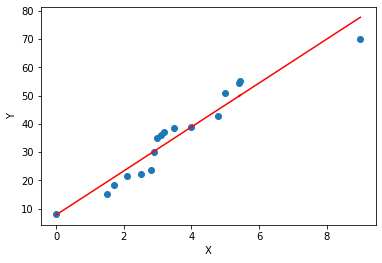

In [197]:
# Se grafica la predicción de la red.
predic = []
for val in X:
    predic.append(modeloCapasOcultas.predict([val])[0][0])
plt.plot(X, predic, c='r')
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")

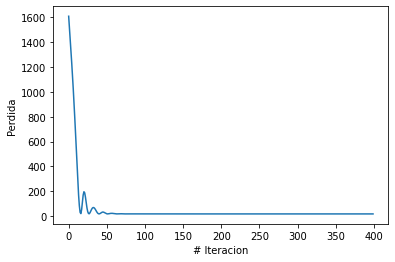

In [198]:
# Se verifica el valor de la función de costo conforme se entrena la red.
plt.xlabel("# Iteracion")
plt.ylabel("Perdida")
plt.plot(historial.history["loss"])

In [199]:
resultado = modeloCapasOcultas.predict([1])
print(resultado)

[[15.5548725]]


Finalmente, se observa que el incremento de capas logró que la red aprendiera de forma mucho más rápida, logrando minimizar completamente la función de costo en menos de 100 iteraciones en lugar del modelo previo que le tomó más epochs acercarse a un valor mínimo. 